In [27]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, PrecisionRecallDisplay, average_precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from itertools import cycle
import warnings
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.utils import shuffle
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import label_binarize

In [28]:
df = pd.read_csv("Thessaloniki_classification.csv")

In [29]:
warnings.filterwarnings("ignore")

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     376 non-null    int64  
 1   Driver_licence             376 non-null    int64  
 2   Truck_licence              376 non-null    int64  
 3   Motor_licence              376 non-null    int64  
 4   Car_access                 376 non-null    int64  
 5   Bike_access                376 non-null    int64  
 6   Skate_access               376 non-null    int64  
 7   Motor_access               376 non-null    int64  
 8   Hsize                      376 non-null    int64  
 9   Vehicles                   376 non-null    int64  
 10  Mode                       376 non-null    int64  
 11  Time                       376 non-null    int64  
 12  Convenience                376 non-null    int64  
 13  Cost                       376 non-null    int64  

In [5]:
drops = ["Mode"]
X = df.drop(drops, axis=1)

<Axes: >

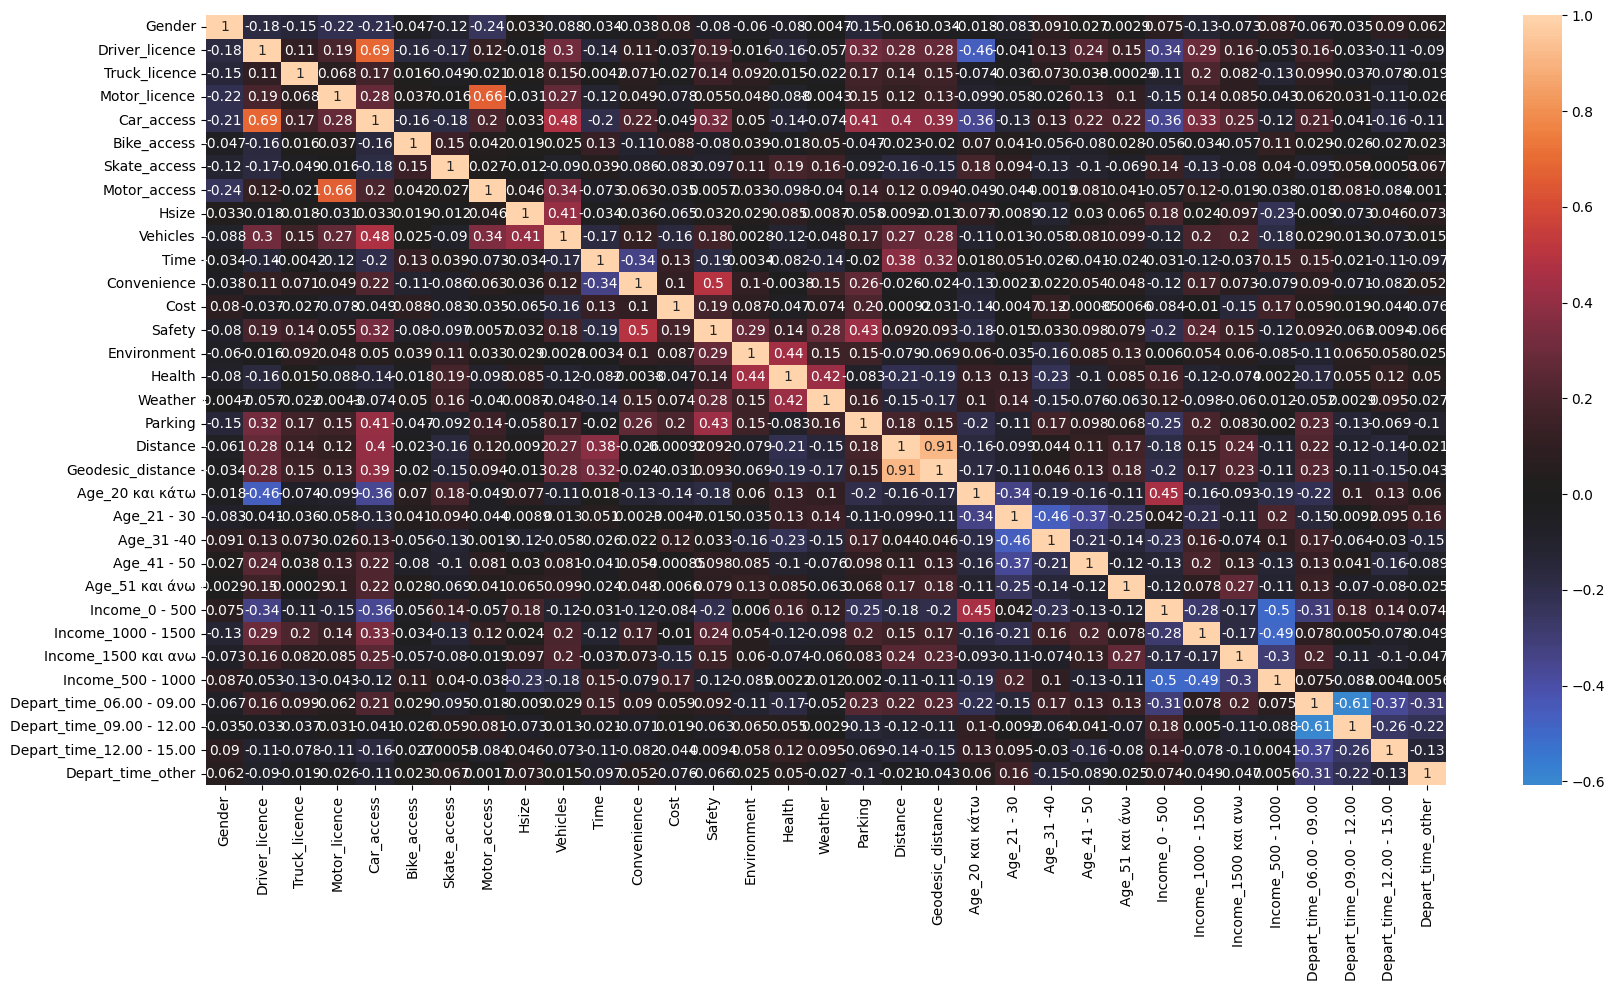

In [6]:
corrMatrix = X.corr()
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrMatrix, annot=True, center=0, ax=ax)

In [7]:
df.columns

Index(['Gender', 'Driver_licence', 'Truck_licence', 'Motor_licence',
       'Car_access', 'Bike_access', 'Skate_access', 'Motor_access', 'Hsize',
       'Vehicles', 'Mode', 'Time', 'Convenience', 'Cost', 'Safety',
       'Environment', 'Health', 'Weather', 'Parking', 'Distance',
       'Geodesic_distance', 'Age_20 και κάτω', 'Age_21 - 30', 'Age_31 -40',
       'Age_41 - 50', 'Age_51 και άνω', 'Income_0 - 500', 'Income_1000 - 1500',
       'Income_1500 και ανω', 'Income_500 - 1000', 'Depart_time_06.00 - 09.00',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_other'],
      dtype='object')

In [31]:
drops = ['Truck_licence', 'Car_access', 'Motor_access', 'Driver_licence', 'Motor_licence',
       'Skate_access', 'Bike_access', 'Geodesic_distance', 'Vehicles',
        'Mode']
X = df.drop(drops, axis=1)
y = df["Mode"]

In [32]:
X

,Gender,Hsize,Time,Convenience,Cost,Safety,Environment,Health,Weather,Parking,...,Age_41 - 50,Age_51 και άνω,Income_0 - 500,Income_1000 - 1500,Income_1500 και ανω,Income_500 - 1000,Depart_time_06.00 - 09.00,Depart_time_09.00 - 12.00,Depart_time_12.00 - 15.00,Depart_time_other
0,0,4,60,1,3,2,4,5,3,4,...,0,0,0,0,0,1,0,1,0,0
1,0,3,40,4,4,4,2,2,2,3,...,0,0,0,0,0,1,1,0,0,0
2,1,3,35,4,5,3,2,1,4,2,...,0,0,1,0,0,0,1,0,0,0
3,1,4,6,5,3,3,3,3,5,3,...,0,0,0,0,0,1,1,0,0,0
4,0,3,46,5,5,5,2,3,5,5,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,0,4,18,5,3,5,3,3,3,5,...,0,0,0,1,0,0,0,0,1,0
372,1,1,60,3,5,3,5,3,3,3,...,1,0,0,0,0,1,0,1,0,0
373,0,3,44,4,3,3,4,5,5,3,...,0,0,0,0,0,1,1,0,0,0
374,1,3,18,4,5,3,4,3,3,3,...,0,0,0,0,0,1,0,0,1,0


In [33]:
X, y = shuffle(X, y, random_state=42)

# Split Ration of 60 : 40

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state =42, stratify=y)

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print("Class counts in y_train:")
print(y_train_series.value_counts())

print("\nClass counts in y_test:")
print(y_test_series.value_counts())

Class counts in y_train:
Mode
0    80
1    73
2    72
Name: count, dtype: int64

Class counts in y_test:
Mode
0    53
2    49
1    49
Name: count, dtype: int64


In [37]:
undersampler = RandomUnderSampler(sampling_strategy={0: 72}, random_state=42)
X_train, y_train = undersampler.fit_resample(X_train, y_train)

In [38]:
undersampler = RandomUnderSampler(sampling_strategy={1: 72}, random_state=42)
X_train, y_train = undersampler.fit_resample(X_train, y_train)

In [39]:
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print("Class counts in y_train:")
print(y_train_series.value_counts())

print("\nClass counts in y_test:")
print(y_test_series.value_counts())

Class counts in y_train:
Mode
0    72
1    72
2    72
Name: count, dtype: int64

Class counts in y_test:
Mode
0    53
2    49
1    49
Name: count, dtype: int64


# Logistic Regression

In [40]:
log_reg=LogisticRegression(random_state=42)

In [41]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'solver': ['lbfgs', 'liblinear', 'newton-cg'],
              'max_iter': [100, 200, 300, 400]}

In [42]:
grid_search_log = GridSearchCV(log_reg, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

In [43]:
grid_search_log.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300, 400],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg']},
             scoring='accuracy')

In [44]:
log_params = grid_search_log.best_params_
print(log_params)

{'C': 100, 'max_iter': 100, 'solver': 'liblinear'}


In [45]:
logreg_model=grid_search_log.best_estimator_
y_pred_log = logreg_model.predict(X_test)
Log_Report = classification_report(y_test, y_pred_log)
print('Log_Report:', Log_Report, sep='\n')

Log_Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93        53
           1       0.98      0.84      0.90        49
           2       0.92      0.98      0.95        49

    accuracy                           0.93       151
   macro avg       0.93      0.93      0.93       151
weighted avg       0.93      0.93      0.93       151



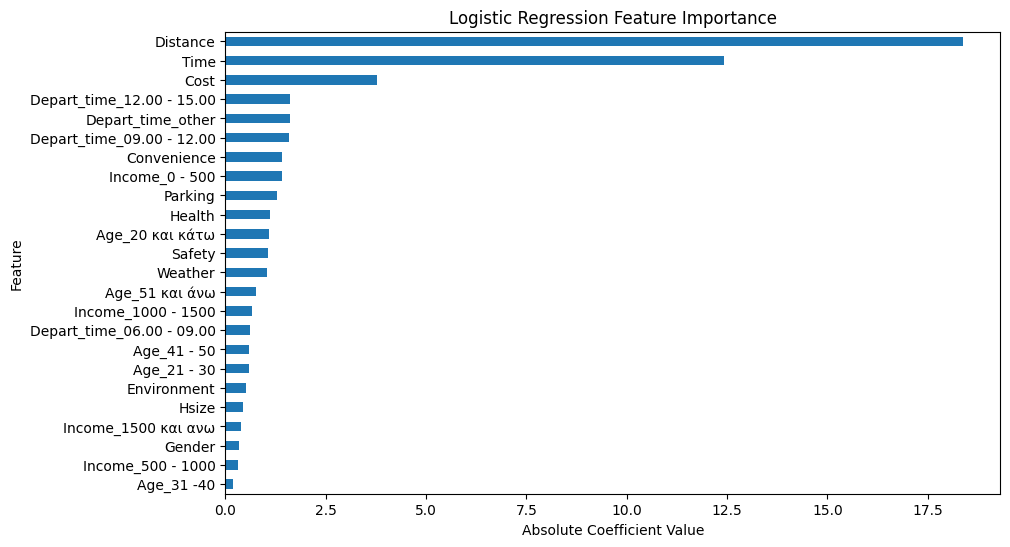

In [46]:
coefficients = pd.Series(logreg_model.coef_[0], index=X.columns)

sorted_coefficients = coefficients.abs().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
sorted_coefficients.plot(kind='barh')
plt.title('Logistic Regression Feature Importance')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [47]:
print(sorted_coefficients)

Age_31 -40                    0.186915
Income_500 - 1000             0.316513
Gender                        0.350574
Income_1500 και ανω           0.390692
Hsize                         0.442790
Environment                   0.519511
Age_21 - 30                   0.584799
Age_41 - 50                   0.595669
Depart_time_06.00 - 09.00     0.624176
Income_1000 - 1500            0.658053
Age_51 και άνω                0.773717
Weather                       1.027679
Safety                        1.065860
Age_20 και κάτω               1.082657
Health                        1.122204
Parking                       1.294756
Income_0 - 500                1.406059
Convenience                   1.412376
Depart_time_09.00 - 12.00     1.580434
Depart_time_other             1.611957
Depart_time_12.00 - 15.00     1.621844
Cost                          3.791358
Time                         12.430846
Distance                     18.385486
dtype: float64


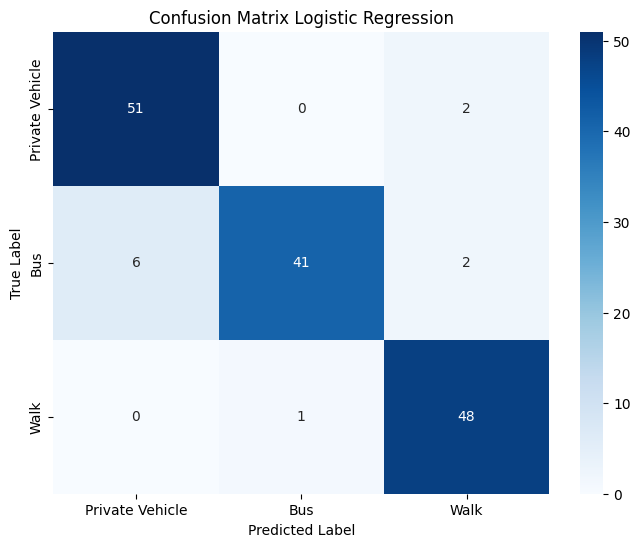

In [54]:
class_labels = ["Private Vehicle", "Bus", "Walk"]

conf_matrix_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [55]:
class_labels_mapping = {
    0: 'private vehicle',
    1: 'bus',
    2: 'walk'
}

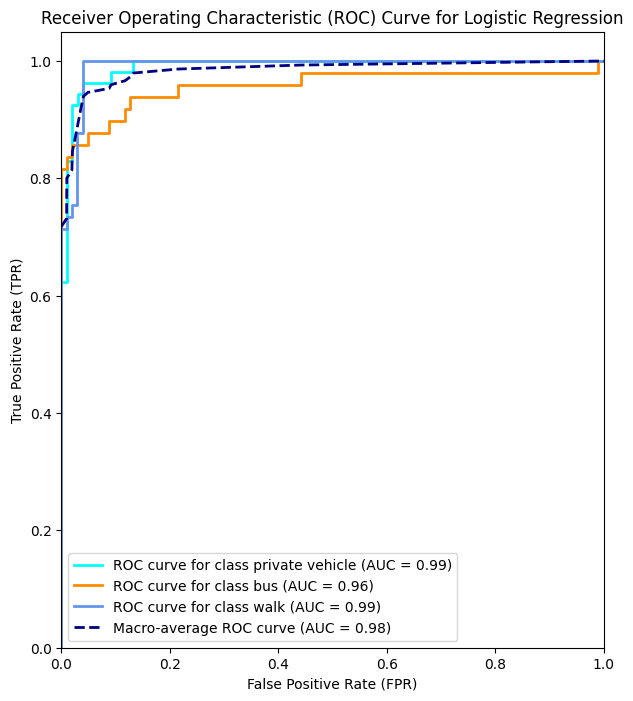

In [56]:
class_probabilities_log = logreg_model.predict_proba(X_test)
y_pred_prob_log = np.argmax(class_probabilities_log, axis=1)
y_test_bin_log = label_binarize(y_test, classes=logreg_model.classes_)
# ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(logreg_model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin_log[:, i], class_probabilities_log[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(logreg_model.classes_))]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(len(logreg_model.classes_)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= len(logreg_model.classes_)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve
_, ax_roc = plt.subplots(figsize=(7, 8))
colors_roc = cycle(["aqua", "darkorange", "cornflowerblue"])

for i, (class_labels, color) in enumerate(zip(logreg_model.classes_, colors_roc)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve for class {class_name} (AUC = {roc_auc[i]:0.2f})')

plt.plot(fpr["macro"], tpr["macro"], color='navy', lw=2, linestyle='--', label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:0.2f})')

ax_roc.set_xlim([0.0, 1.0])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.set_xlabel('False Positive Rate (FPR)')
ax_roc.set_ylabel('True Positive Rate (TPR)')
ax_roc.legend(loc="best")
ax_roc.set_title("Receiver Operating Characteristic (ROC) Curve for Logistic Regression")

plt.show()

# Decision Tree

In [57]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
max_depth = dt_model.tree_.max_depth
max_depth

7

In [58]:
y_pred_test = dt_model.predict(X_test)
Tree_Report = classification_report(y_test, y_pred_test)
print('Tree_Report:', Tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        53
           1       0.87      0.84      0.85        49
           2       0.94      0.92      0.93        49

    accuracy                           0.90       151
   macro avg       0.90      0.90      0.90       151
weighted avg       0.90      0.90      0.90       151



In [59]:
param_grid = {
    'max_depth': list(range(2, 8))
}

grid_search_dt = GridSearchCV(dt_model, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1, param_grid={'max_depth': [2, 3, 4, 5, 6, 7]},
             scoring='accuracy')

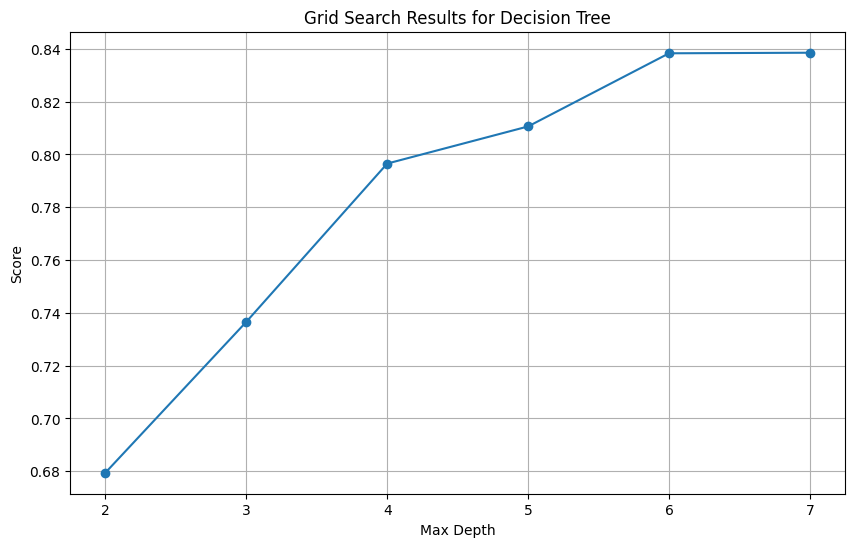

In [60]:
results = grid_search_dt.cv_results_
max_depth_values = results['param_max_depth'].data
mean_accuracy = results['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mean_accuracy, marker='o')
plt.title('Grid Search Results for Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [72]:
 tree = DecisionTreeClassifier(random_state = 42, max_depth=6)
tree.fit(X_train, y_train)
y_pred_test = tree.predict(X_test)
Tree_Report = classification_report(y_test, y_pred_test)
print('Tree_Report:', Tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        53
           1       0.87      0.84      0.85        49
           2       0.94      0.92      0.93        49

    accuracy                           0.90       151
   macro avg       0.90      0.90      0.90       151
weighted avg       0.90      0.90      0.90       151



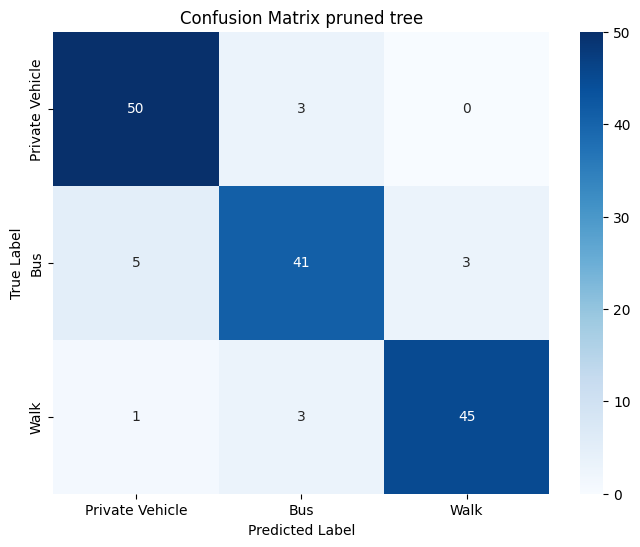

In [73]:
class_labels = ["Private Vehicle", "Bus", "Walk"]
conf_matrix_dt = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix pruned tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [74]:
X.columns

Index(['Gender', 'Hsize', 'Time', 'Convenience', 'Cost', 'Safety',
       'Environment', 'Health', 'Weather', 'Parking', 'Distance',
       'Age_20 και κάτω', 'Age_21 - 30', 'Age_31 -40', 'Age_41 - 50',
       'Age_51 και άνω', 'Income_0 - 500', 'Income_1000 - 1500',
       'Income_1500 και ανω', 'Income_500 - 1000', 'Depart_time_06.00 - 09.00',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_other'],
      dtype='object')

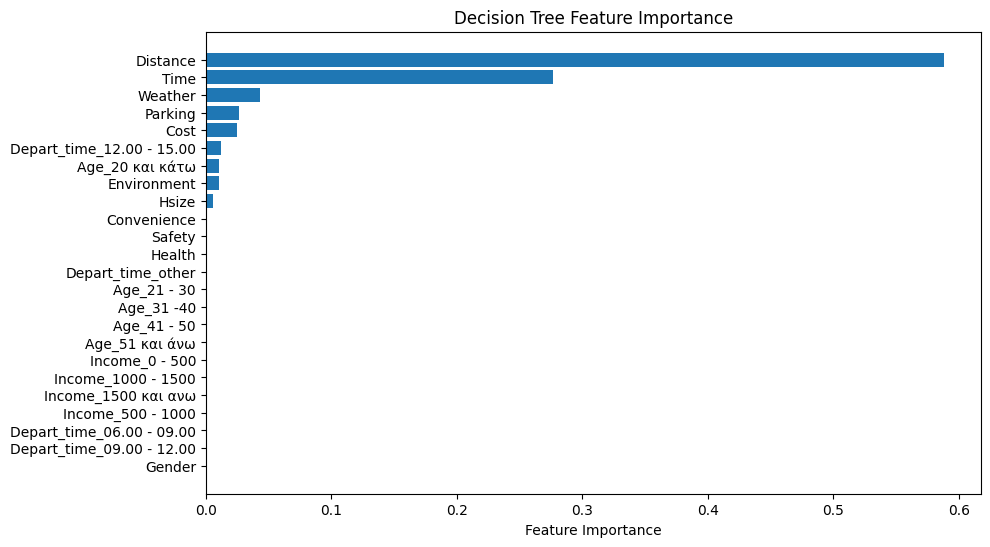

In [75]:
feature_importances = tree.feature_importances_

feature_names = ['Gender', 'Hsize', 'Time', 'Convenience', 'Cost', 'Safety',
       'Environment', 'Health', 'Weather', 'Parking', 'Distance',
       'Age_20 και κάτω', 'Age_21 - 30', 'Age_31 -40', 'Age_41 - 50',
       'Age_51 και άνω', 'Income_0 - 500', 'Income_1000 - 1500',
       'Income_1500 και ανω', 'Income_500 - 1000', 'Depart_time_06.00 - 09.00',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_other']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importance")
plt.show()

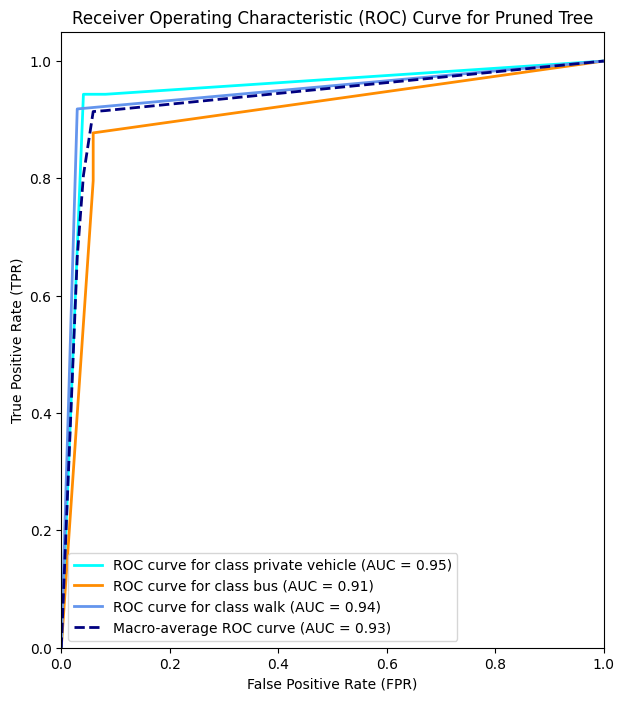

In [76]:
class_probabilities_tree = tree.predict_proba(X_test)
y_pred_prob_tree = np.argmax(class_probabilities_tree, axis=1)
y_test_bin_tree = label_binarize(y_test, classes=tree.classes_)
# ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(tree.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin_tree[:, i], class_probabilities_tree[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(tree.classes_))]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(len(tree.classes_)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= len(tree.classes_)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve
_, ax_roc = plt.subplots(figsize=(7, 8))
colors_roc = cycle(["aqua", "darkorange", "cornflowerblue"])

for i, (class_labels, color) in enumerate(zip(tree.classes_, colors_roc)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve for class {class_name} (AUC = {roc_auc[i]:0.2f})')

plt.plot(fpr["macro"], tpr["macro"], color='navy', lw=2, linestyle='--', label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:0.2f})')

ax_roc.set_xlim([0.0, 1.0])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.set_xlabel('False Positive Rate (FPR)')
ax_roc.set_ylabel('True Positive Rate (TPR)')
ax_roc.legend(loc="best")
ax_roc.set_title("Receiver Operating Characteristic (ROC) Curve for Pruned Tree")

plt.show()

# Random Forest

In [125]:
X_train.shape, X_test.shape

((216, 24), (151, 24))

In [78]:
param_grid = {
    'max_features': range(2, 25)
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)

{'max_features': 18}


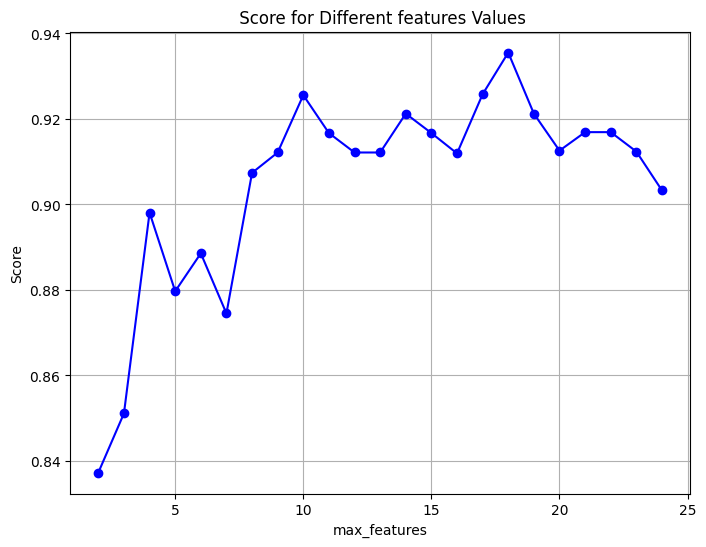

In [79]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['max_features']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for Different features Values')
plt.xlabel('max_features')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [80]:
param_grid = {
    'n_estimators': list(range(51, 400))}
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)

{'n_estimators': 312}


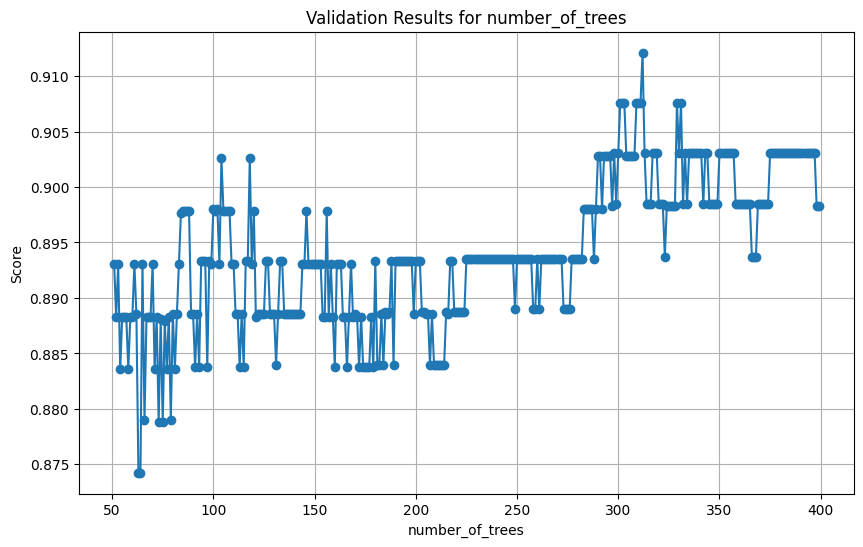

In [81]:
number_of_trees = grid_search.cv_results_['param_n_estimators']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('number_of_trees')
plt.ylabel('Score')
plt.title('Validation Results for number_of_trees')
plt.grid(True)
plt.show()

In [127]:
param_grid = {
    'n_estimators': list(range(300, 350)),
    'max_features': [16, 17, 18]
}
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)

{'max_features': 18, 'n_estimators': 300}


In [128]:
random_forest = grid_search.best_estimator_
y_pred_rf_basic = random_forest.predict(X_test)
reportrfbasic = classification_report(y_test, y_pred_rf_basic)
print(reportrfbasic)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        53
           1       0.94      0.92      0.93        49
           2       0.91      0.98      0.94        49

    accuracy                           0.95       151
   macro avg       0.95      0.95      0.95       151
weighted avg       0.95      0.95      0.95       151



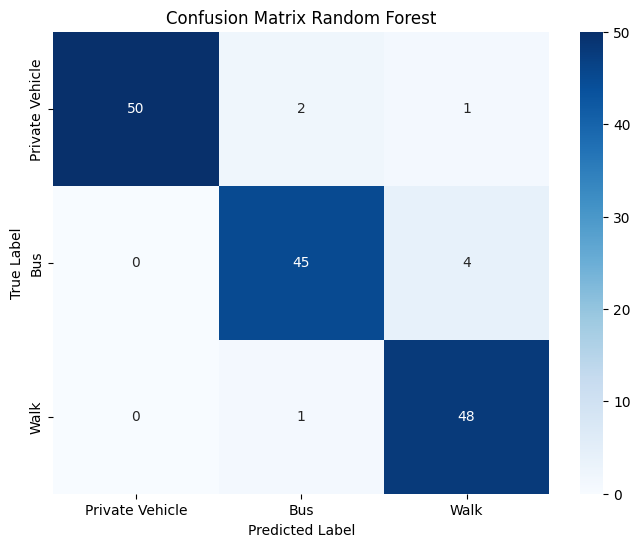

In [129]:
class_labels = ["Private Vehicle", "Bus", "Walk"]
conf_matrix_bag = confusion_matrix(y_test, y_pred_rf_basic)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bag, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [130]:
X.columns

Index(['Gender', 'Hsize', 'Time', 'Convenience', 'Cost', 'Safety',
       'Environment', 'Health', 'Weather', 'Parking', 'Distance',
       'Age_20 και κάτω', 'Age_21 - 30', 'Age_31 -40', 'Age_41 - 50',
       'Age_51 και άνω', 'Income_0 - 500', 'Income_1000 - 1500',
       'Income_1500 και ανω', 'Income_500 - 1000', 'Depart_time_06.00 - 09.00',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_other'],
      dtype='object')

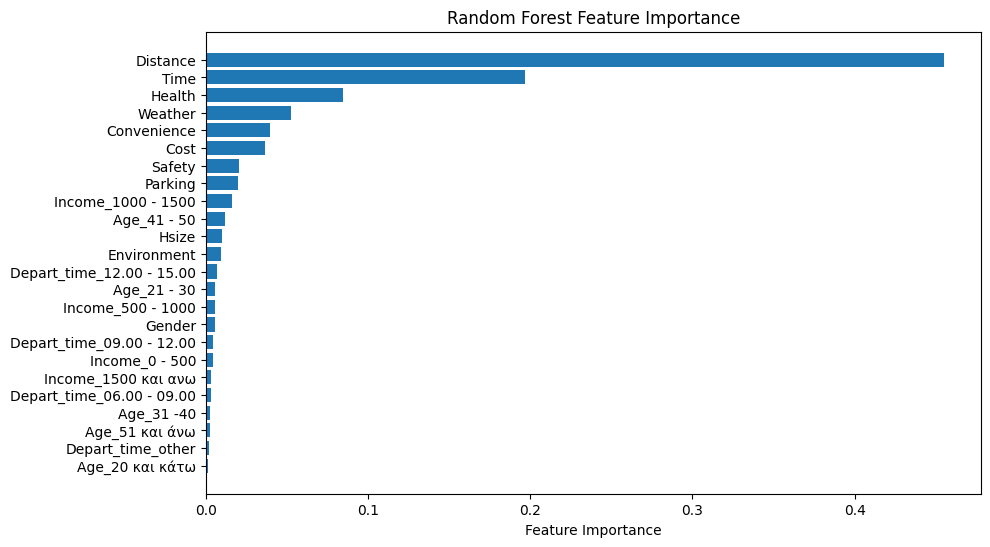

In [131]:
feature_importances = random_forest.feature_importances_

feature_names = ['Gender', 'Hsize', 'Time', 'Convenience', 'Cost', 'Safety',
       'Environment', 'Health', 'Weather', 'Parking', 'Distance',
       'Age_20 και κάτω', 'Age_21 - 30', 'Age_31 -40', 'Age_41 - 50',
       'Age_51 και άνω', 'Income_0 - 500', 'Income_1000 - 1500',
       'Income_1500 και ανω', 'Income_500 - 1000', 'Depart_time_06.00 - 09.00',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_other']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

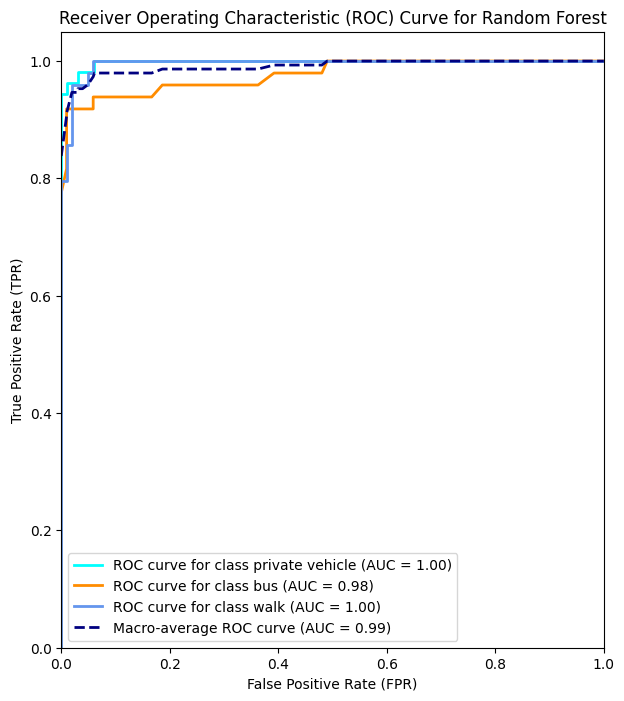

In [132]:
class_probabilities_rf = random_forest.predict_proba(X_test)
y_pred_prob_rf = np.argmax(class_probabilities_rf, axis=1)
y_test_bin_rf = label_binarize(y_test, classes=random_forest.classes_)
# ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(random_forest.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin_rf[:, i], class_probabilities_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(random_forest.classes_))]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(len(random_forest.classes_)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= len(random_forest.classes_)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve
_, ax_roc = plt.subplots(figsize=(7, 8))
colors_roc = cycle(["aqua", "darkorange", "cornflowerblue"])

for i, (class_labels, color) in enumerate(zip(random_forest.classes_, colors_roc)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve for class {class_name} (AUC = {roc_auc[i]:0.2f})')

plt.plot(fpr["macro"], tpr["macro"], color='navy', lw=2, linestyle='--', label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:0.2f})')

ax_roc.set_xlim([0.0, 1.0])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.set_xlabel('False Positive Rate (FPR)')
ax_roc.set_ylabel('True Positive Rate (TPR)')
ax_roc.legend(loc="best")
ax_roc.set_title("Receiver Operating Characteristic (ROC) Curve for Random Forest")

plt.show()

In [133]:
roc_auc['macro']

0.990427103969556

In [134]:
roc_auc[2]

0.9951980792316927

# XGBoost

In [92]:
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

In [93]:
param_grid = {
    'n_estimators': list(range(50, 400)),
}

In [94]:
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

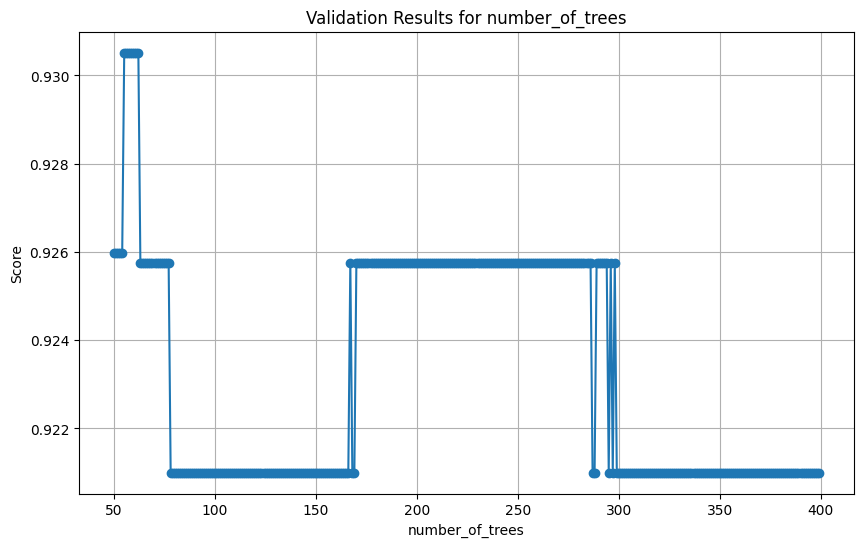

In [95]:
number_of_trees = grid_search.cv_results_['param_n_estimators']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('number_of_trees')
plt.ylabel('Score')
plt.title('Validation Results for number_of_trees')
plt.grid(True)
plt.show()

In [102]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

In [103]:
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

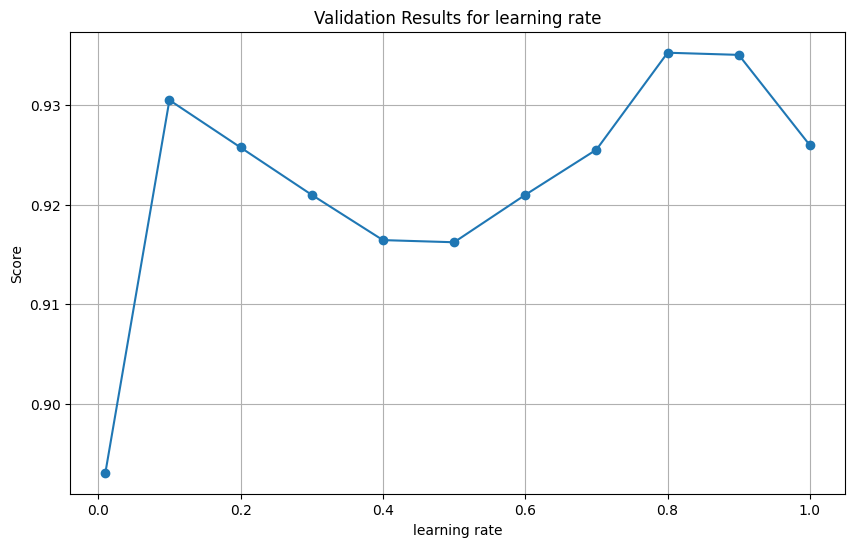

In [104]:
number_of_trees = grid_search.cv_results_['param_learning_rate']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('learning rate')
plt.ylabel('Score')
plt.title('Validation Results for learning rate')
plt.grid(True)
plt.show()

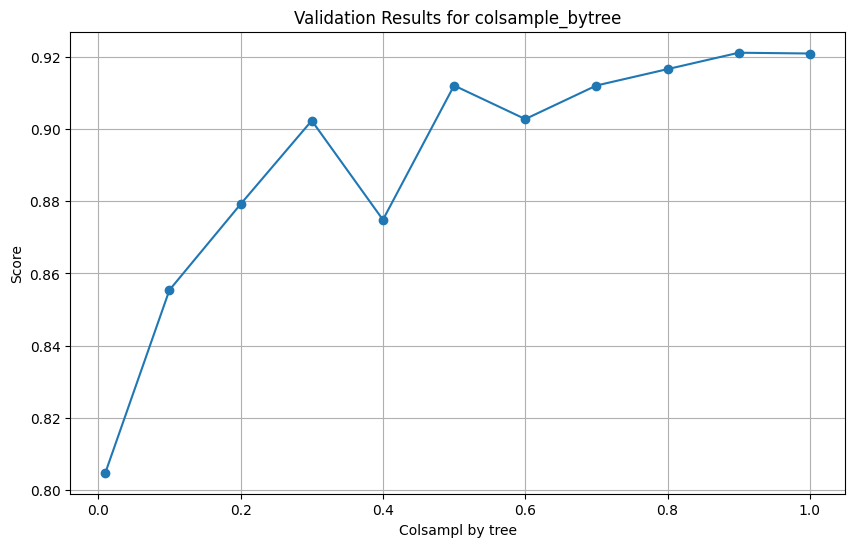

In [105]:
param_grid = {
    'colsample_bytree': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
number_of_trees = grid_search.cv_results_['param_colsample_bytree']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('Colsampl by tree')
plt.ylabel('Score')
plt.title('Validation Results for colsample_bytree')
plt.grid(True)
plt.show()

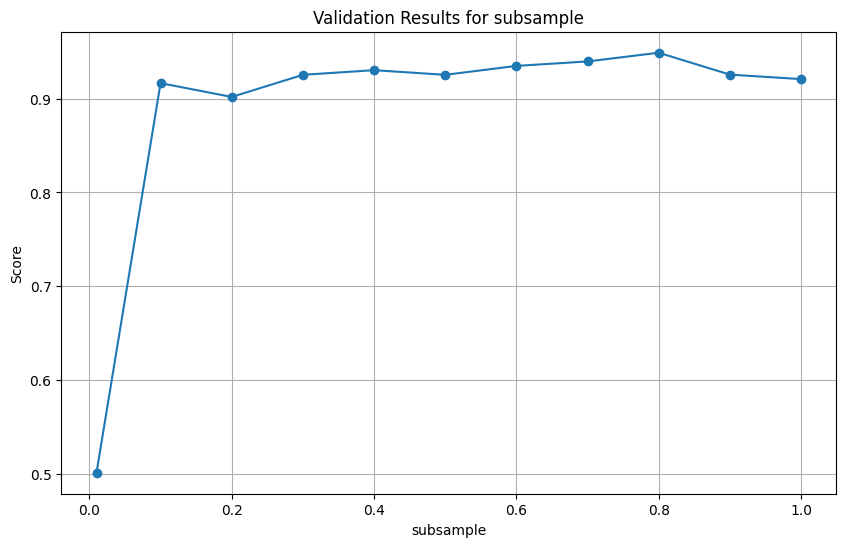

In [106]:
param_grid = {
    'subsample': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
number_of_trees = grid_search.cv_results_['param_subsample']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('subsample')
plt.ylabel('Score')
plt.title('Validation Results for subsample')
plt.grid(True)
plt.show()

In [107]:
param_grid = {
    'n_estimators': list(range(50, 76)),
    'subsample': [0.4, 0.5, 0.6, 0.7, 0.8],
    'colsample_bytree' : [0.8, 0.9, 1],
    'learning_rate': [0.1, 0.8, 0.9]
}

In [108]:
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(best_params)

{'colsample_bytree': 0.9, 'learning_rate': 0.1, 'n_estimators': 52, 'subsample': 0.8}


In [115]:
best_model = grid_search.best_estimator_

In [116]:
y_pred_test = best_model.predict(X_test)
xgbreport = classification_report(y_test, y_pred_test)
print(xgbreport)

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        53
           1       0.92      0.92      0.92        49
           2       0.92      0.98      0.95        49

    accuracy                           0.94       151
   macro avg       0.94      0.94      0.94       151
weighted avg       0.94      0.94      0.94       151



In [117]:
class_labels = ["Private Vehicle", "Bus", "Walk"]

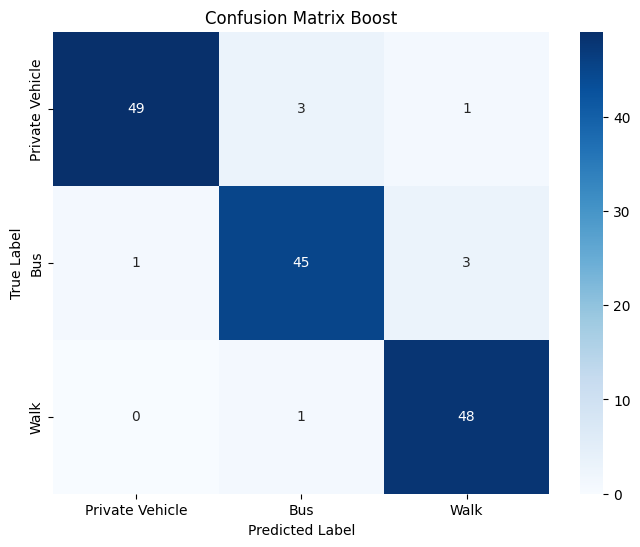

In [118]:
conf_matrix_ada = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ada, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Boost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [119]:
X.columns

Index(['Gender', 'Hsize', 'Time', 'Convenience', 'Cost', 'Safety',
       'Environment', 'Health', 'Weather', 'Parking', 'Distance',
       'Age_20 και κάτω', 'Age_21 - 30', 'Age_31 -40', 'Age_41 - 50',
       'Age_51 και άνω', 'Income_0 - 500', 'Income_1000 - 1500',
       'Income_1500 και ανω', 'Income_500 - 1000', 'Depart_time_06.00 - 09.00',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_other'],
      dtype='object')

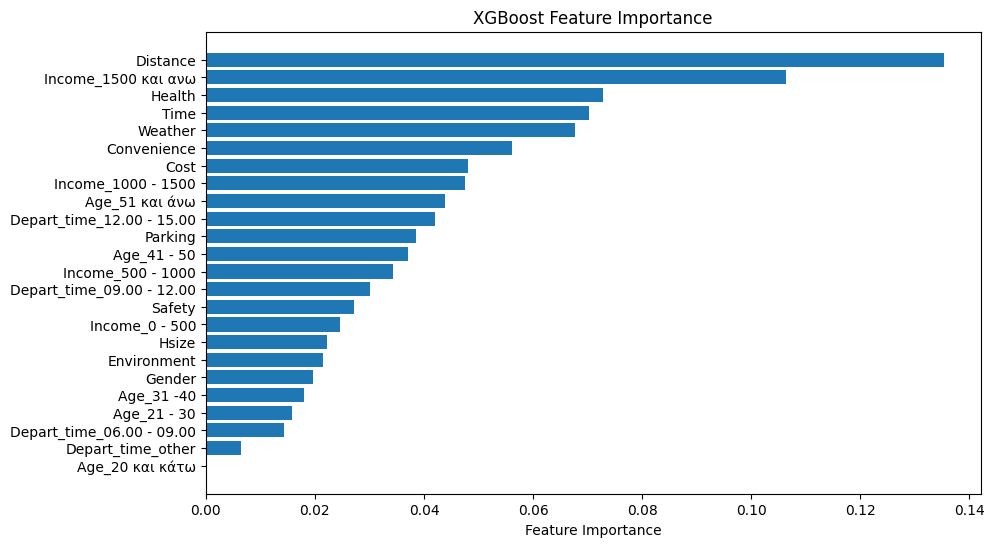

In [120]:
feature_importances = xgb_classifier.feature_importances_

feature_names = ['Gender', 'Hsize', 'Time', 'Convenience', 'Cost', 'Safety',
       'Environment', 'Health', 'Weather', 'Parking', 'Distance',
       'Age_20 και κάτω', 'Age_21 - 30', 'Age_31 -40', 'Age_41 - 50',
       'Age_51 και άνω', 'Income_0 - 500', 'Income_1000 - 1500',
       'Income_1500 και ανω', 'Income_500 - 1000', 'Depart_time_06.00 - 09.00',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_other']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.show()

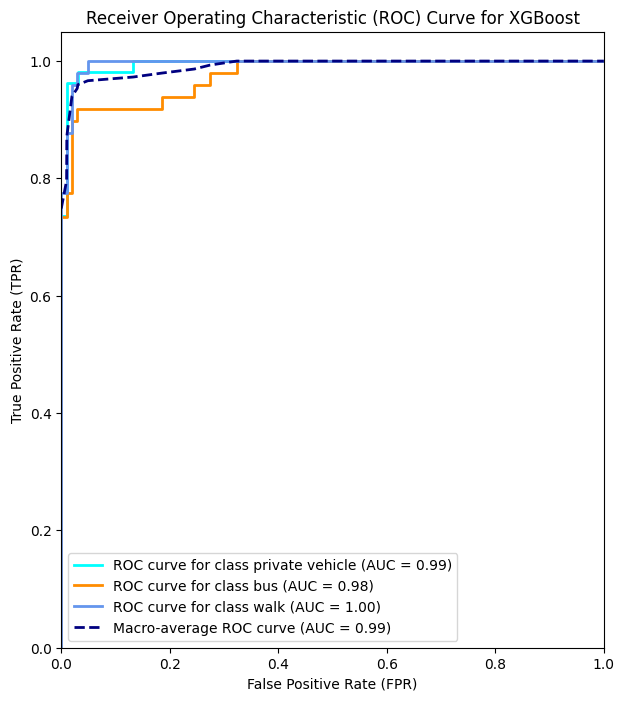

In [121]:
class_probabilities_xgb = best_model.predict_proba(X_test)
y_pred_prob_xgb = np.argmax(class_probabilities_xgb, axis=1)
y_test_bin_xgb = label_binarize(y_test, classes=best_model.classes_)
# ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(best_model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin_xgb[:, i], class_probabilities_xgb[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(best_model.classes_))]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(len(best_model.classes_)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= len(best_model.classes_)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve
_, ax_roc = plt.subplots(figsize=(7, 8))
colors_roc = cycle(["aqua", "darkorange", "cornflowerblue"])

for i, (class_labels, color) in enumerate(zip(best_model.classes_, colors_roc)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve for class {class_name} (AUC = {roc_auc[i]:0.2f})')

plt.plot(fpr["macro"], tpr["macro"], color='navy', lw=2, linestyle='--', label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:0.2f})')

ax_roc.set_xlim([0.0, 1.0])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.set_xlabel('False Positive Rate (FPR)')
ax_roc.set_ylabel('True Positive Rate (TPR)')
ax_roc.legend(loc="best")
ax_roc.set_title("Receiver Operating Characteristic (ROC) Curve for XGBoost")

plt.show()

In [123]:
roc_auc[2]

0.995798319327731

In [122]:
roc_auc['macro']

0.9902796056171154

# KNN

In [135]:
knn_classifier = KNeighborsClassifier()

In [136]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]}

In [137]:
grid_search = GridSearchCV(knn_classifier, param_grid, scoring='accuracy', cv=10)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29]},
             scoring='accuracy')

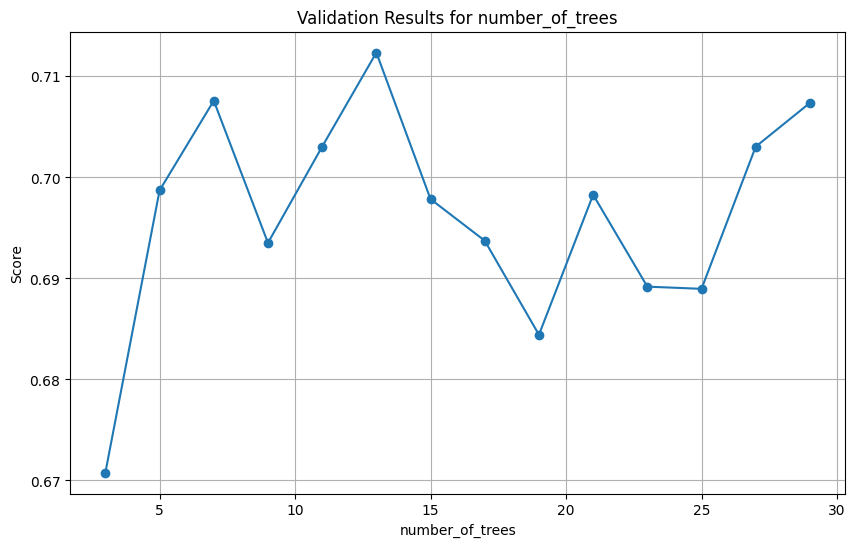

In [138]:
number_of_trees = grid_search.cv_results_['param_n_neighbors']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('number_of_trees')
plt.ylabel('Score')
plt.title('Validation Results for number_of_trees')
plt.grid(True)
plt.show()

In [139]:
best_params = grid_search.best_params_
print(best_params)

{'n_neighbors': 13}


In [140]:
knn_classifier = KNeighborsClassifier(n_neighbors=13)
knn_classifier.fit(X_train, y_train)
y_pred_test = knn_classifier.predict(X_test)
knnreport = classification_report(y_test, y_pred_test)
print(knnreport)

              precision    recall  f1-score   support

           0       0.84      0.68      0.75        53
           1       0.71      0.59      0.64        49
           2       0.61      0.84      0.71        49

    accuracy                           0.70       151
   macro avg       0.72      0.70      0.70       151
weighted avg       0.72      0.70      0.70       151



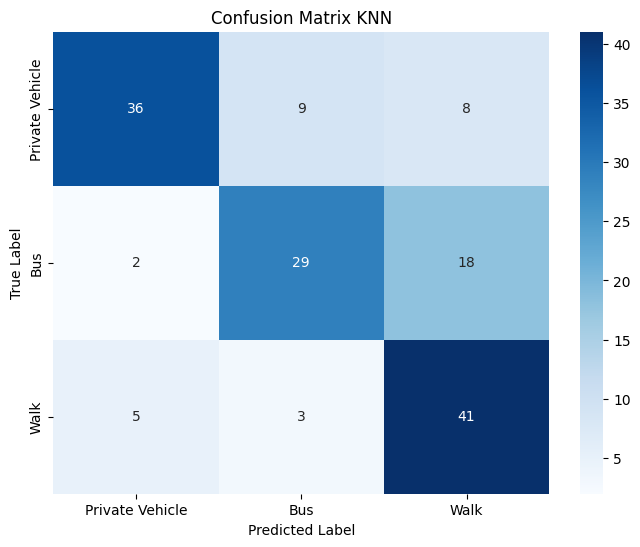

In [142]:
class_labels = ["Private Vehicle", "Bus", "Walk"]
conf_matrix_ada = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ada, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()